## An XGBoost Regressor Model to Predict the price of a Cryptocurrency

In [10]:
import yfinance
import numpy as np
import pandas as pd

symbol = "ETH-USD"

start = "2014-01-01"

end = "2023-09-30"

df= yfinance.download(symbol,start, end)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-09-25,1580.747437,1595.844116,1565.025513,1588.322876,1588.322876,4394930984
2023-09-26,1588.023193,1598.097778,1580.165527,1593.417236,1593.417236,3544861160
2023-09-27,1593.108276,1631.910767,1585.368896,1597.491211,1597.491211,5533036096


In [11]:
df.to_csv("Eth_2014-23.csv")

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-09-25,1580.747437,1595.844116,1565.025513,1588.322876,1588.322876,4394930984
2023-09-26,1588.023193,1598.097778,1580.165527,1593.417236,1593.417236,3544861160
2023-09-27,1593.108276,1631.910767,1585.368896,1597.491211,1597.491211,5533036096


In [13]:
y = df["Adj Close"].values
y

array([ 320.88400269,  299.25299072,  314.68099976, ..., 1597.49121094,
       1652.88269043, 1667.94384766])

In [14]:
X = df[["Open", "High", "Low", "Volume"]].values
X

array([[3.08644989e+02, 3.29451996e+02, 3.07056000e+02, 8.93249984e+08],
       [3.20670990e+02, 3.24717987e+02, 2.94541992e+02, 8.85985984e+08],
       [2.98585999e+02, 3.19453003e+02, 2.98191986e+02, 8.42300992e+08],
       ...,
       [1.59310828e+03, 1.63191077e+03, 1.58536890e+03, 5.53303610e+09],
       [1.59767200e+03, 1.66602417e+03, 1.59729468e+03, 6.65809217e+09],
       [1.65299988e+03, 1.68728125e+03, 1.64865649e+03, 5.52968754e+09]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
X_train.shape, y_train.shape

((1613, 4), (1613,))

In [17]:
X_test.shape, y_test.shape

((538, 4), (538,))

In [19]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(objective = "reg:squarederror")

In [20]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Plot model features

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

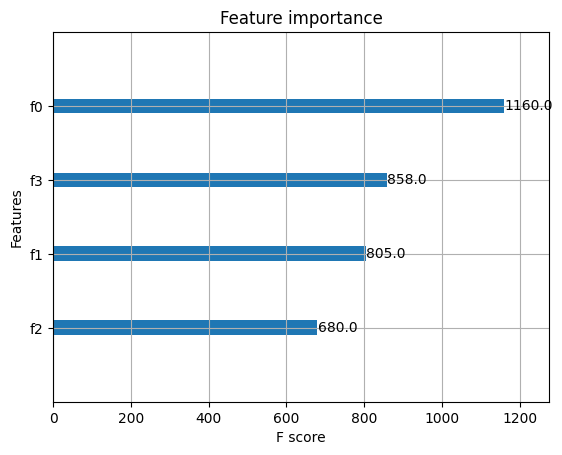

In [21]:
xgboost.plot_importance(model)

### Handle missing features. 

Build model with imputed data

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_train

array([[1.58020004e+02, 1.67220383e+02, 1.57443954e+02, 7.53131691e+09],
       [2.82761401e+03, 2.87414600e+03, 2.78552295e+03, 1.86097415e+10],
       [2.40692432e+03, 2.54214478e+03, 2.38151514e+03, 1.64814895e+10],
       ...,
       [2.63934143e+02, 2.71505585e+02, 2.62121216e+02, 8.12685394e+09],
       [2.25361435e+02, 2.29903214e+02, 2.22254990e+02, 6.72616465e+09],
       [1.40478485e+02, 1.41003235e+02, 1.35855423e+02, 5.08724780e+09]])

In [24]:
X_test = imputer.transform(X_test)
X_test

array([[1.83251355e+03, 1.86113611e+03, 1.83016504e+03, 4.53604193e+09],
       [1.55149780e+03, 1.61911401e+03, 1.54949377e+03, 6.81381974e+09],
       [4.01869580e+03, 4.07379150e+03, 3.94769019e+03, 1.39217562e+10],
       ...,
       [3.12685840e+03, 3.15461523e+03, 2.86185205e+03, 1.58602062e+10],
       [2.88434058e+03, 2.93730859e+03, 2.76164331e+03, 1.57481734e+10],
       [1.85531662e+02, 1.86703140e+02, 1.82593887e+02, 5.51269651e+09]])

In [25]:
imputed_model = XGBRegressor(objective = "reg:squarederror")
imputed_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
y_predict = imputed_model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_predict, y_test)

24.27995870370404

In [29]:
imputed_model.score(X_test, y_test)

0.9985106945010475